In [62]:
import matplotlib.pyplot as plt

In [63]:
from PIL import Image,ImageDraw

In [64]:
input_image=Image.new(mode="RGB",size=(500,500),color="red") #72 dpi by default
input_image.save("image_o.png")

In [65]:
import numpy as np

In [66]:
w,h=input_image.size
w,h

(500, 500)

In [67]:
img=Image.open("image_o.png")
rawdata=img.load()

In [68]:
# Inclined Lines
x=list(np.arange(0,500,0.1))
y=list(np.arange(0,500,0.1))

for i,j in zip(x,y):
  rawdata[i,j]=(255,255,0)
img.save("test1.png")

for i,j in zip(x,y):
  j=499-i
  rawdata[i,j]=(255,255,0)
img.save("test2.png")

In [69]:
# Two Horizontal Lines
l1_x=list(np.arange(99,400,0.1))
l1_y=[99]*len(l1_x)
l2_x=list(np.arange(99,400,0.1))
l2_y=[399]*len(l2_x)

for i,j in zip(l1_x,l1_y):
  rawdata[i,j]=(191, 64, 191)
img.save("test3.png")

for i,j in zip(l2_x,l2_y):
  rawdata[i,j]=(191, 64, 191)
img.save("test4.png")

In [70]:
# Two vertical lines
l3_y=list(np.arange(99,400,0.1))
l3_x=[99]*len(l3_y)
l4_y=list(np.arange(99,400,0.1))
l4_x=[399]*len(l4_y)

for i,j in zip(l3_x,l3_y):
  rawdata[i,j]=(191, 64, 191)
img.save("test5.png")

for i,j in zip(l4_x,l4_y):
  rawdata[i,j]=(191, 64, 191)
img.save("test6.png")

In [71]:
# Function defining locus of a circle
def locus(h,k,r):
  x=[int(i) for i in range(h-r,h+r+1)]
  y=[int((r**2-(i-h)**2)**0.5+k) for i in x]
  c=zip(x,y)

  y1=[int(-(r**2-(i-h)**2)**0.5+k) for i in x]
  d=zip(x,y1)
  return c,d

In [72]:
# Center of a circle and it's radius
h,k,r=50,140,40
a=locus(h,k,r)

In [73]:
# Circle boundary
for i,j in a[0]:
  rawdata[i,j]=(0,255,0)

for i,j in a[1]:
  rawdata[i,j]=(0,255,0)

img.save("test_1.png")

In [74]:
# Filling lower half of circle
h,k,r=50,140,40
a=locus(h,k,r)
for i,j in a[0]:
  for m in range(k,j+1):
    rawdata[i,m]=(70, 255, 247)

img.save("test_2.png")

In [75]:
# Filling upper half of circle
h,k,r=50,140,40
a=locus(h,k,r)
for i,j in a[1]:
  for m in range(j+1,k):
    rawdata[i,m]=(70, 255, 247)

img.save("test_3.png")

In [76]:
# Filling remaining shapes
target_pixel_1=(350,230)
target_color_1=(0,255,0)

target_pixel_2=(150,230)
target_color_2=(255,255,255)

In [77]:
img1=Image.open("test_3.png")

In [78]:
ImageDraw.floodfill(img1,target_pixel_1,target_color_1,thresh=0.5)
ImageDraw.floodfill(img1,target_pixel_2,target_color_2,thresh=0.5)

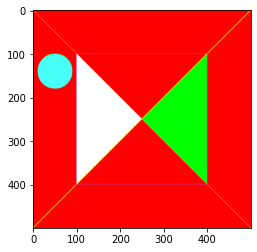

In [79]:
plt.imshow(img1)

In [80]:
img1.save("final.png")